In [2]:
# go to the root directory
# %cd /home/studio-lab-user/701-simplicity-bias
%cd D:/repos/701-simplicity-bias/
import os

assert os.path.exists('./trainers/trainer.py')

D:\repos\701-simplicity-bias


In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
from synthetic_data.linear_slabs import LinearSlabDataset

## $LMS-5, MS-(5,7), \hat{LMS}-7$

In [4]:
data_config = dict(
    num_samples=110000,
    num_dim=50,
    margins=0.1,
    width=1.0,
    random_orthonormal_transform=True
)

lms_5_data_config = data_config | {'slabs': np.array([2] + [5] * 49), 'noise_proportions': 0,
                                   'slab_probabilities': [[1.0, 1.0]] +  [[0.125, 0.5, 0.75, 0.5, 0.125]] * 49}
ms_57_data_config = data_config | {'slabs': np.array([5] + [7] * 49), 'noise_proportions': 0,
                                   'slab_probabilities': [[0.125, 0.5, 0.75, 0.5, 0.125]] +
                                                         [[1/16.0, 0.25, 7 / 16.0, 0.5, 7 / 16.0, 0.25, 1 / 16.0]] * 49}
lms_7_noisy_data_config = data_config | {'slabs': np.array([2] + [7] * 49),
                                         'noise_proportions': np.array([0.1] + [0] * 49),
                                         'slab_probabilities': [[1.0, 1.0]] +
                                                               [[1/16.0, 0.25, 7 / 16.0, 0.5, 7 / 16.0, 0.25, 1 / 16.0]] * 49}
lms_7_40000_noisy_data_config = lms_7_noisy_data_config | {'num_samples': 40000 + 10000}

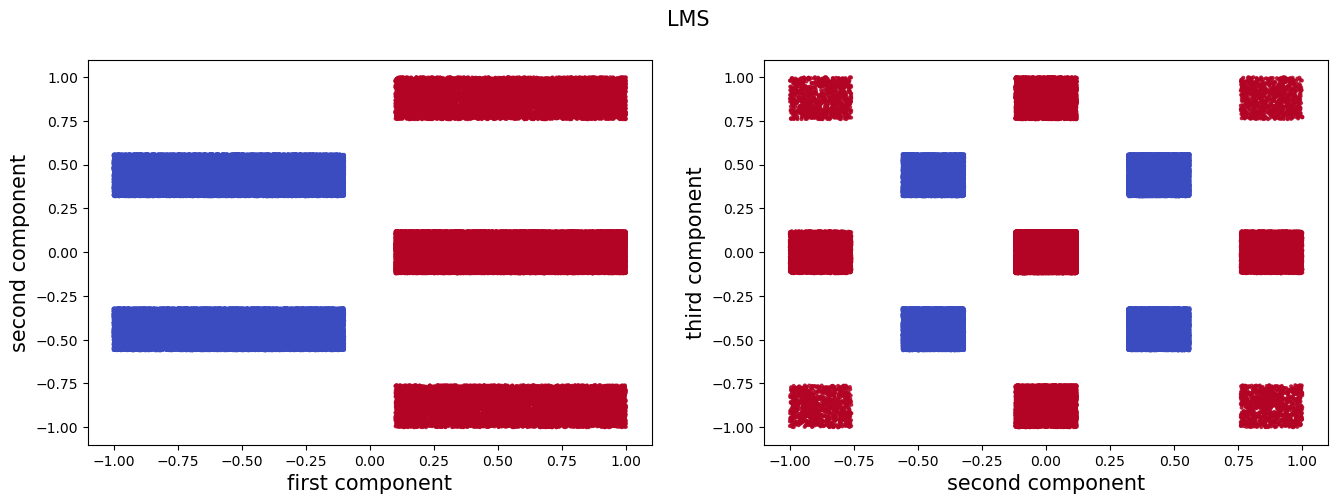

In [5]:
lms_5_data = LinearSlabDataset.generate(**lms_5_data_config)
lms_5_data.visualize()

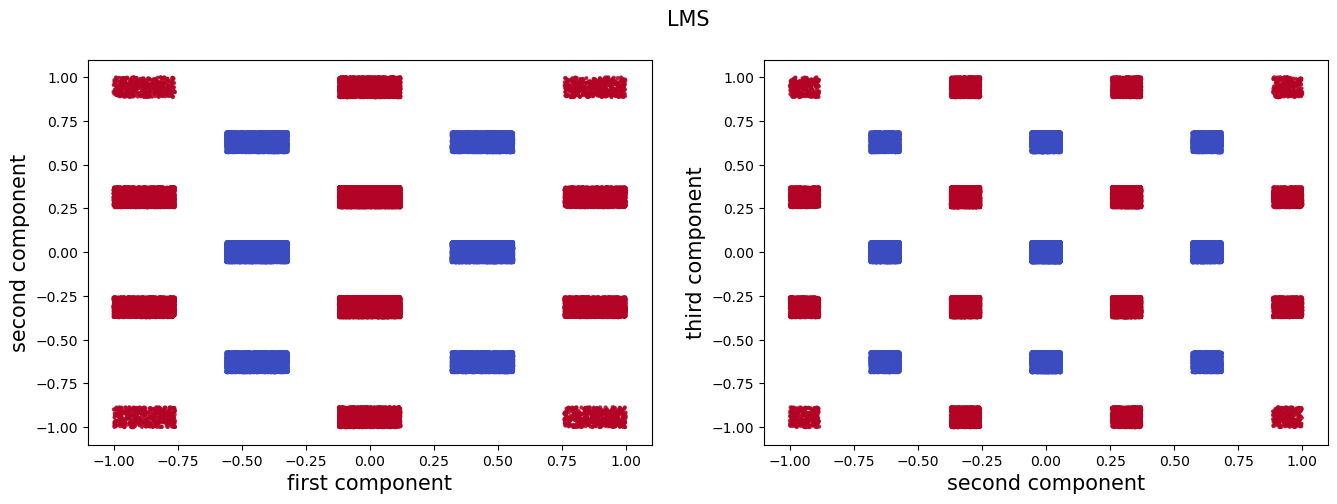

In [6]:
ms_57_data = LinearSlabDataset.generate(**ms_57_data_config)
ms_57_data.visualize()

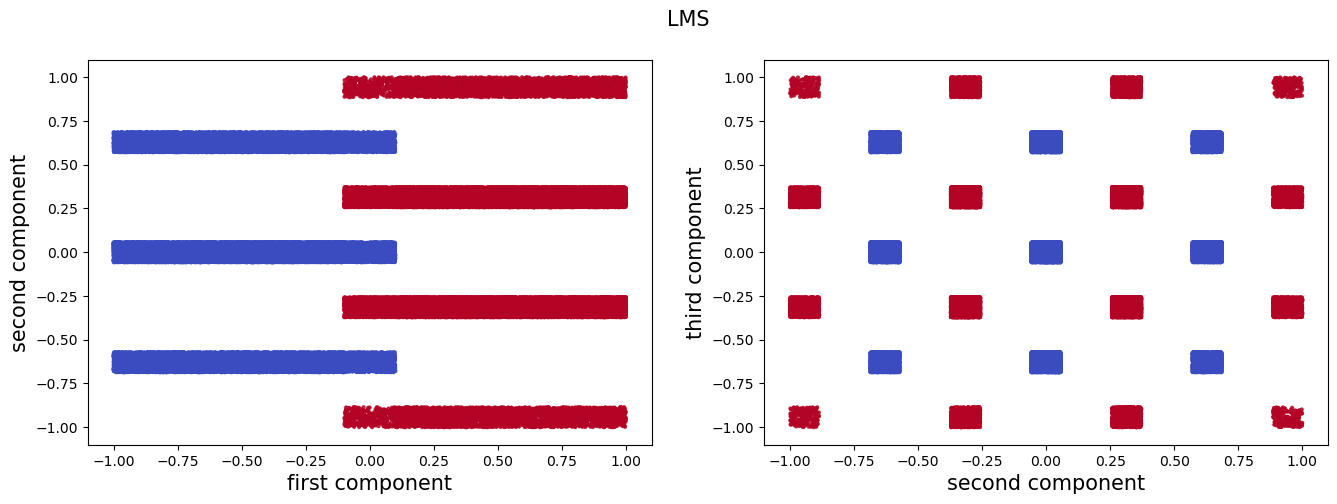

In [7]:
lms_7_noisy_data = LinearSlabDataset.generate(**lms_7_noisy_data_config)
lms_7_noisy_data.visualize()

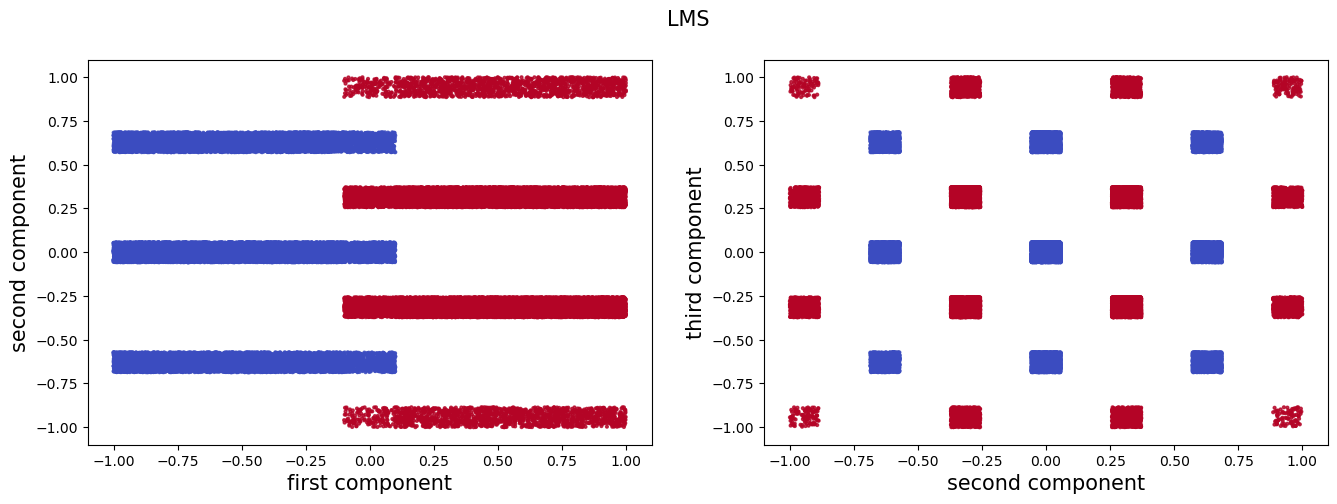

In [8]:
lms_7_40000_noisy_data = LinearSlabDataset.generate(**lms_7_40000_noisy_data_config)
lms_7_40000_noisy_data.visualize()

In [9]:
#@title train/val split and save linear data
os.makedirs('./data', exist_ok=True)
data_dir = os.path.abspath('./data')
print('Saving Data to {}'.format(data_dir))
train_size = 100000
for name, data, train_size in [
    ('lms_5', lms_5_data, 100000),
    ('ms_57', ms_57_data, 100000),
    ('lms_7_noisy', lms_7_noisy_data, 100000),
    ('lms_7_40000_noisy', lms_7_40000_noisy_data, 40000),
]:
    path = os.path.join(data_dir, name)
    data.save_as(path, train_size)

Saving Data to D:\repos\701-simplicity-bias\data


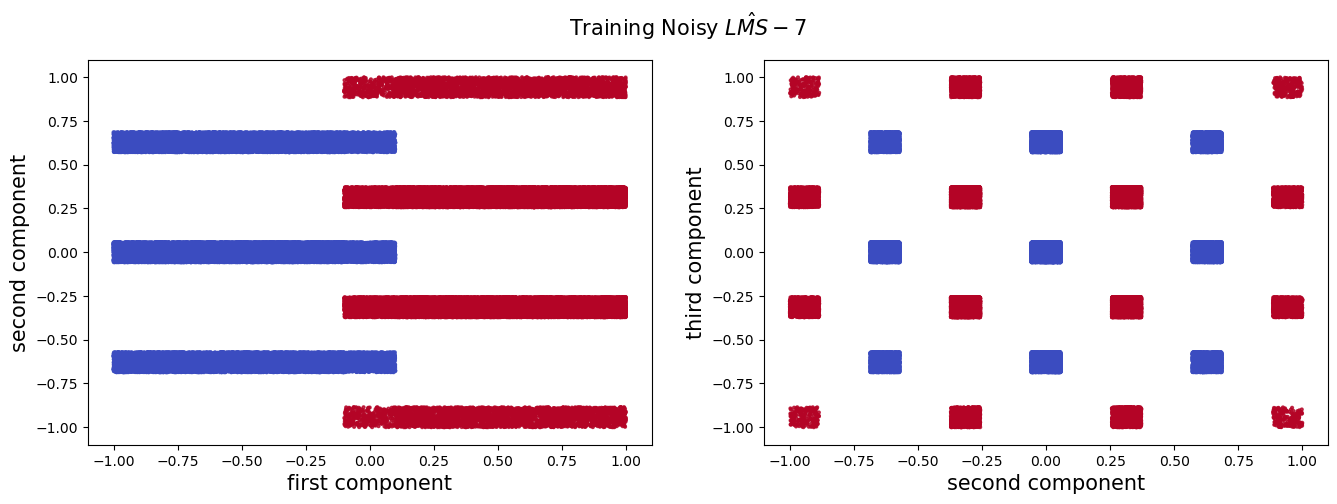

In [10]:
#@title test loading data
loaded_lms7_train= LinearSlabDataset.from_file(os.path.join(data_dir, 'lms_7_noisy_train.npz'))
loaded_lms7_train.visualize( title=r'Training Noisy $\hat{LMS}-7$')